In [1]:
from skimage.io import imread, imsave, imshow
from scipy.signal import convolve2d
import numpy as np

In [2]:
img = imread('20278r.jpg')

In [3]:
def addition(img, n, m):
    height = img.shape[0]
    width = img.shape[1]
    dim = img.shape[2]
    
    #vertical_add = np.array([[[255, 255, 255] for col in range(m)] for row in range(height)])
    vertical_add = np.zeros((height, m, dim), dtype=np.uint8)

    res_img = np.concatenate((np.concatenate((vertical_add, img), axis=1), 
                              vertical_add), axis=1)
    
    for i in range(height):
        for j in range(m):
            m_minus_j = m - j
            res_img[i, m_minus_j - 1] = np.mean(res_img[i, m_minus_j : m_minus_j + m], 0)
            m_plus_width_plus_j = m + width + j
            res_img[i, m_plus_width_plus_j] = np.mean(res_img[i, m_plus_width_plus_j - m: m_plus_width_plus_j], 0)
    
    res_width = res_img.shape[1]
        
    #horizontal_add = np.array([[[255, 255, 255] for col in range(res_width)] for row in range(n)])
    horizontal_add = np.zeros((n, res_width, dim), dtype=np.uint8)
    
    res_img = np.concatenate((np.concatenate((horizontal_add, res_img), axis=0), 
                              horizontal_add), axis=0)
    
    res_height = res_img.shape[0]
    
    for i in reversed(range(n)):
        for j in range(res_width):
            i_plus_1 = i + 1
            res_img[i, j] = np.mean(res_img[i_plus_1 : i_plus_1 + n, j], 0)
            res_h_minus_1_minus_i = res_height - 1 - i 
            res_img[res_h_minus_1_minus_i, j] = np.mean(res_img[res_h_minus_1_minus_i - n : res_h_minus_1_minus_i, j], 0)
            
    return res_img

In [4]:
l = addition(img, 10, 10)
imshow(l)

In [5]:
def _filter(img, n, m, filter_name):
    extended_img = addition(img, n // 2, m // 2)
    res = img.copy()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(img.shape[2]):
                res[i, j, k] = filter_name(n, m, i, j, k, extended_img)
    return res

In [6]:
def box(n, m, i, j, k, extended_img):
    return np.mean(extended_img[i : i + n, j : j + m, k])

In [7]:
def median(n, m, i, j, k, extended_img):
    return np.median(extended_img[i : i + n, j : j + m, k])

In [8]:
def rgb2gray(rgb):
    single = np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)
    return single

In [9]:
def gauss_function(sigma, x, y):
    return 1 / ((2 * np.pi) * sigma**2) * np.e**((-x**2 - y**2) / (2 * sigma**2))

In [10]:
def gauss_matrix(sigma):
    k = round(3 * sigma)
    matrix = np.array([[gauss_function(sigma, x, y) for x in np.arange(-k, k + 1)] for y in np.arange(-k, k + 1)])
    return matrix / np.sum(matrix, axis=(0,1))

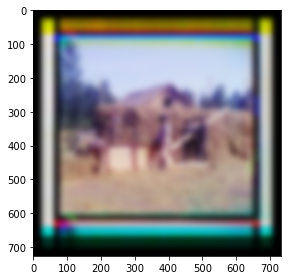

In [11]:
matrix = gauss_matrix(9)
img_ = [0,1,2]
tmp_img = addition(img, 20, 20)
for i in range(img.shape[2]):
    img_[i] = convolve2d(tmp_img[:,:,i], matrix).astype('uint8')
imshow(np.dstack((img_[0],img_[1],img_[2])))

In [ ]:
l1 = _filter(img, 50, 50, box)
imshow(l1)

In [ ]:
l2 = _filter(img, 50, 50, median)
imshow(l2)

In [ ]:
roberts = np.array( [[ 0, 0, 0 ],
                     [ 0, 1, 0 ],
                     [ 0, 0,-1 ]] )
imgg = convolve2d(rgb2gray(img3), roberts).astype('uint8')
imshow(imgg)

In [ ]:
prewitt = np.array([[-1,-1,-1 ],
                    [ 0, 0, 0 ],
                    [ 1, 1, 1 ]])
imgg = convolve2d(rgb2gray(img3), prewitt).astype('uint8')
imshow(imgg)

In [ ]:
sobel = np.array([[-1, 0, 1 ],
                  [-2, 0 ,2 ],
                  [-1, 0 ,1 ]])
imgg = convolve2d(rgb2gray(img3), sobel).astype('uint8')
sobel = np.array([[-1,-2,-1 ],
                  [ 0, 0 ,0 ],
                  [ 1, 2 ,1 ]])
imgg = convolve2d(imgg, sobel).astype('uint8')
imshow(imgg)